In [51]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
#Cargamos nuestro archivo
data = pd.read_csv('C:/Users/Estivens Reyes/archivos/Princesas.csv')
data = pd.DataFrame(data)
data

,Princesa,Personalidad
0,Blancanieves,Blancanieves es una princesa de noble cuna que...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ..."
3,Bella,Bella es una muchacha que vive en la campiña f...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince..."
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil..."
6,Mulan,Mulan es atípica a los anteriores papeles feme...
7,Tiana,Es una joven camarera que sueña con ser dueña ...
8,Mérida,Mérida llama la atención por su característico...
9,Moana,"Moana, una joven de 16 años de edad, hija únic..."


In [53]:
def preprocesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split()])
    return texto

In [54]:
data['preprocesado'] = data['Personalidad'].apply(lambda texto: preprocesado(texto))
data

,Princesa,Personalidad,preprocesado
0,Blancanieves,Blancanieves es una princesa de noble cuna que...,blancaniev princes nobl cun ve forz servidumbr...
1,Cenicienta,Cenicienta es inicialmente una sirvienta en su...,cenicient inicial sirvient cas constant objet ...
2,Aurora,"La Princesa Aurora, la Bella Durmiente, es la ...",princes auror bell durmient hij unic rein flor...
3,Bella,Bella es una muchacha que vive en la campiña f...,bell muchach viv campiñ frances padr inventor ...
4,Jasmín,"Cuando se introdujo por primera vez, la Prince...",introduj primer vez princes jasmin poc dias de...
5,Pocahontas,"El nombre de Pocahontas significa ""Pequeña Sil...",nombr pocahont signif pequeñ silenci bas figur...
6,Mulan,Mulan es atípica a los anteriores papeles feme...,mul atip anterior papel femenin pelicul disney...
7,Tiana,Es una joven camarera que sueña con ser dueña ...,jov camarer sueñ ser dueñ propi restaur algun ...
8,Mérida,Mérida llama la atención por su característico...,mer llam atencion caracterist pel anaranj oscu...
9,Moana,"Moana, una joven de 16 años de edad, hija únic...",moan jov años edad hij unic sucesor import jef...


In [55]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

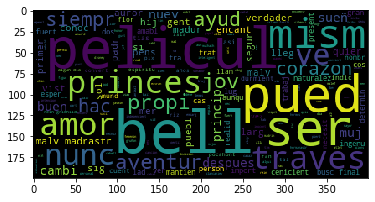

In [56]:
palabras = data.preprocesado.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
plt.imshow(wordcloud)
plt.show()

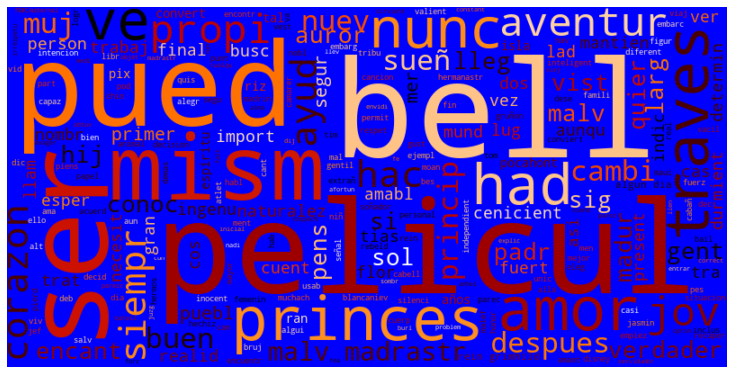

In [59]:
palabras = data.preprocesado.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

    max_font_size=150, max_words=250,
    background_color='blue', colormap='gist_heat',
    stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

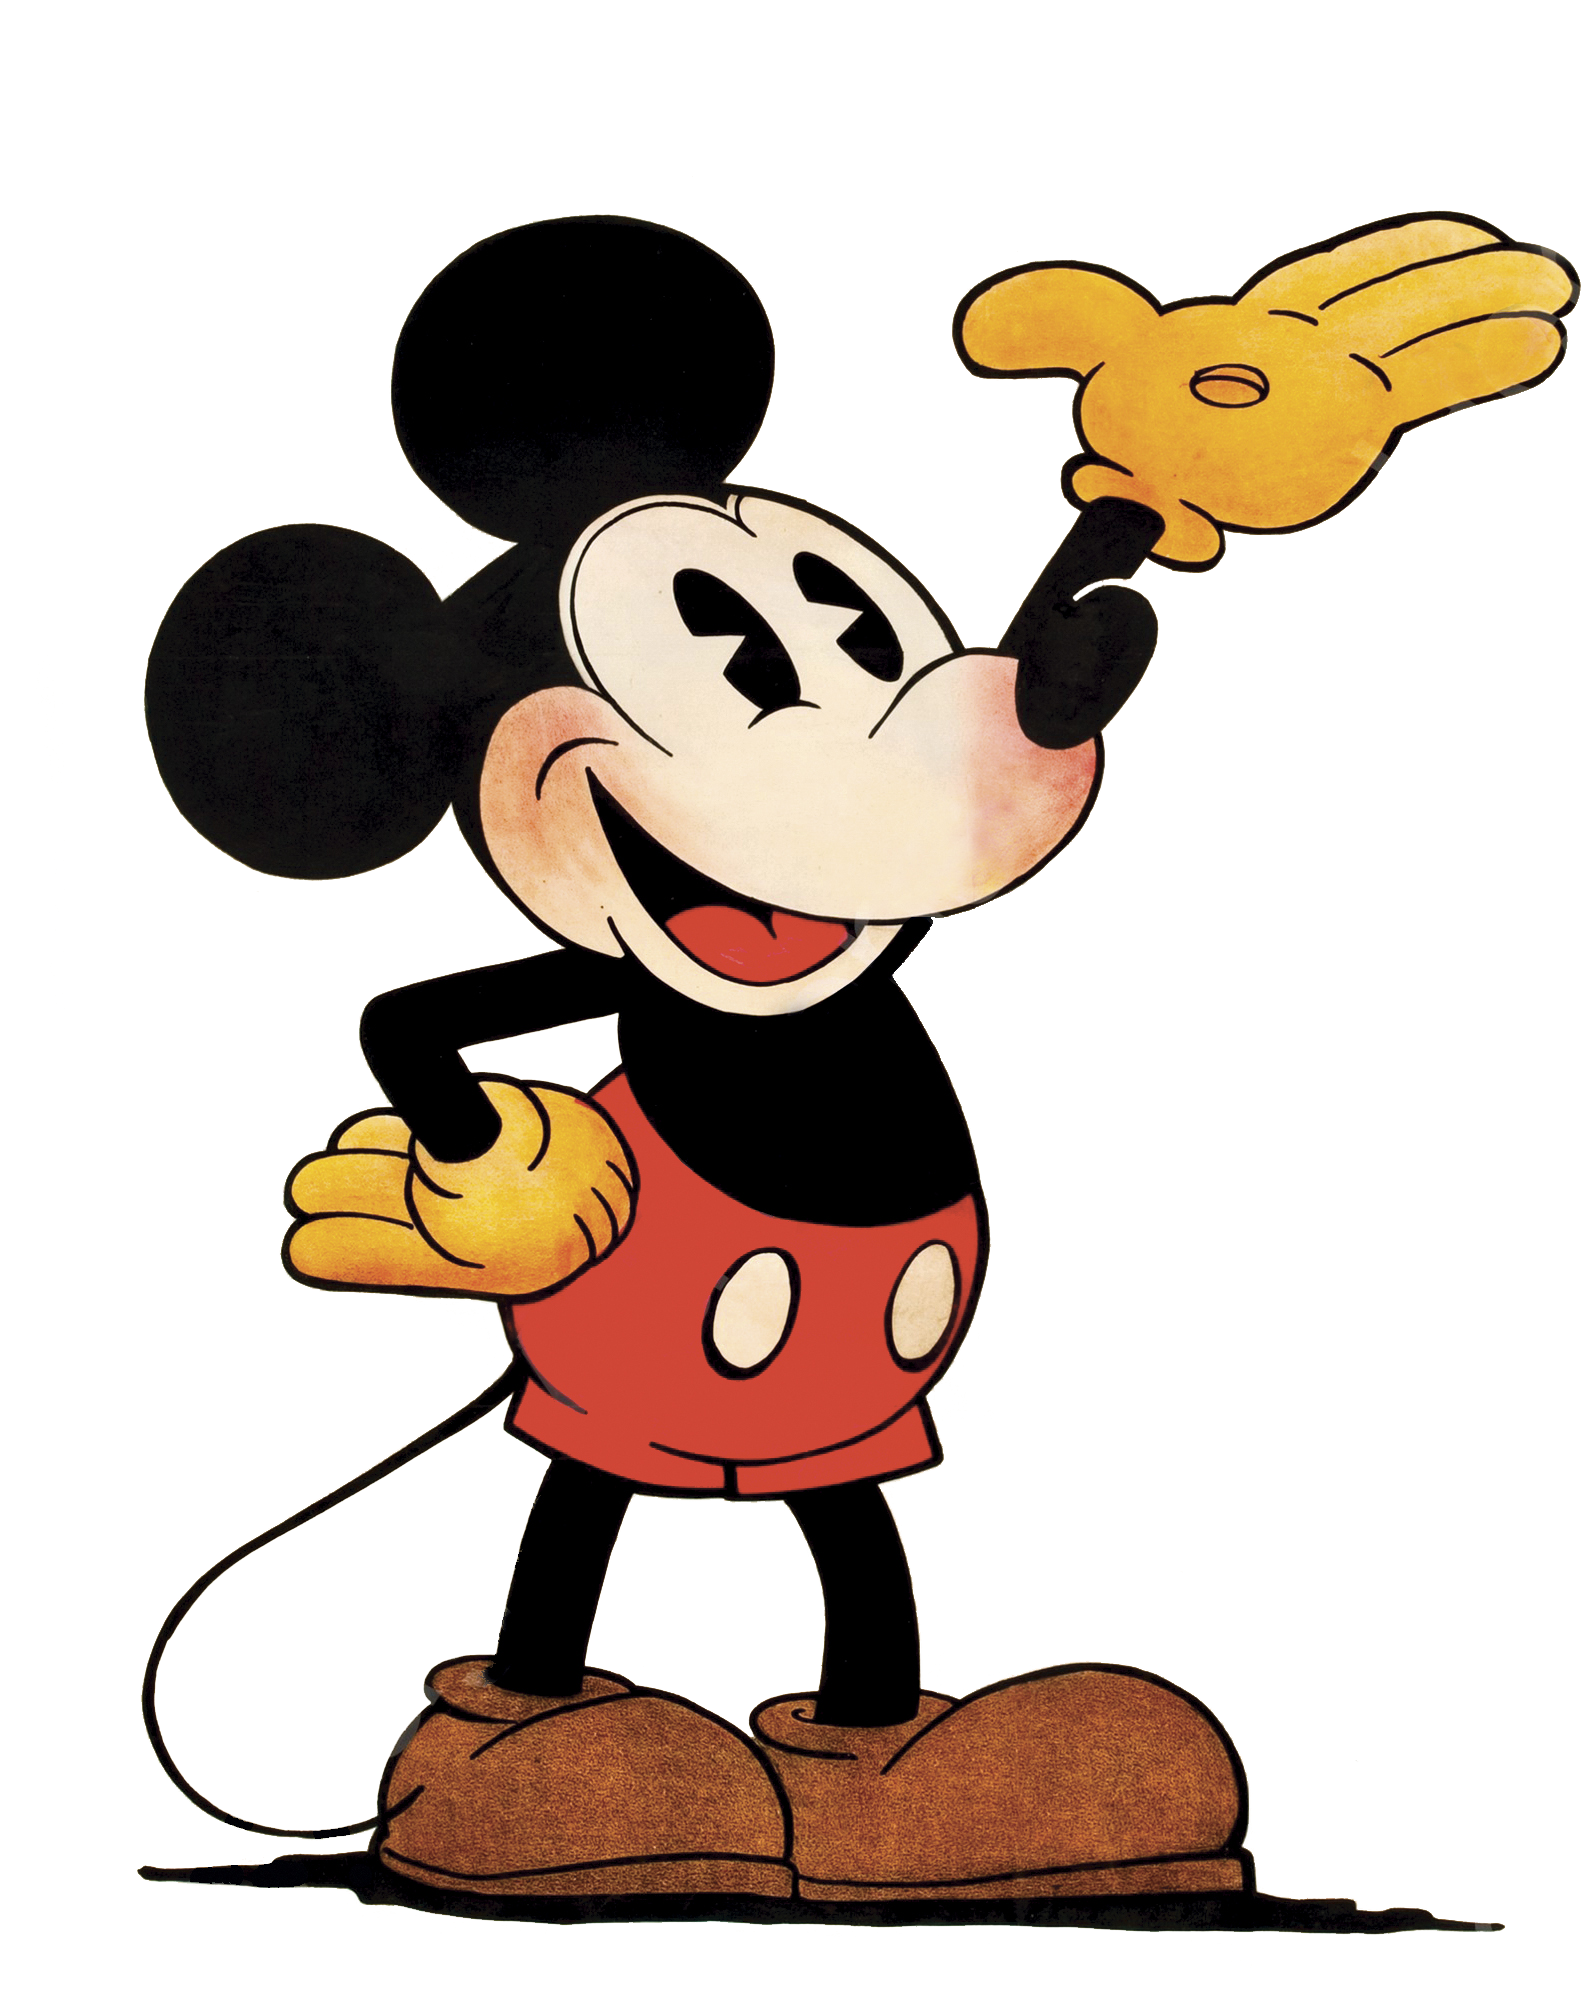

In [112]:
mickey = PIL.Image.open("img/mickey.png")
display(mickey)

In [113]:
mask = np.array(mickey)
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

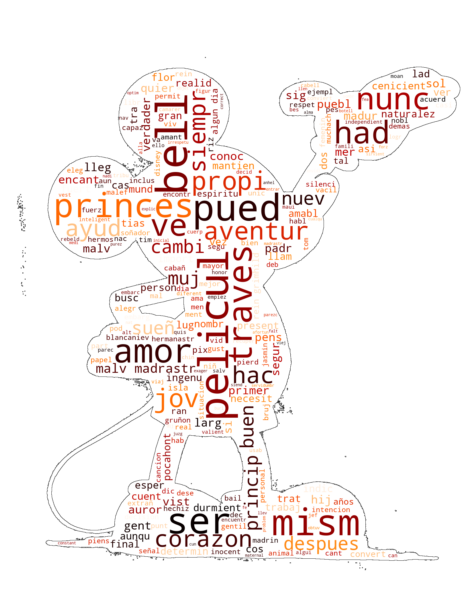

In [118]:
palabras = data.preprocesado.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords,
                      mask=mask, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("crown.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()